### Importing  Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading data

In [2]:
data=pd.read_csv('G:/GFG ( Python For Data Sci )/Machine Learning/feature-engineering/global_heat_index.csv')
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [3]:
data.shape

(17520, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


### Data Cleaning

In [5]:
index=data[(data['Hour']>=0) & (data['Hour']<=7)].index

In [6]:
df=data.drop(index=index,axis=0)
df.shape

(11680, 11)

In [7]:
#cleaned data 
df.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698


### Preparing training and testing data

In [8]:
x=df.iloc[:,5:-1].values
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)
x_train.shape,x_test.shape

((8176, 5), (3504, 5))

### Standardizing the data

In [9]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
y_train=scalar.fit_transform(y_train.ravel().reshape(-1,1))

In [10]:
print(x_train)

[[-0.24660559  0.69743384 -0.89706951  0.3642184  -1.20060591]
 [-2.16571032  1.19008063  0.1569011  -1.15336026  0.88176496]
 [ 0.05489092 -0.12236785 -0.49411742  1.05779806  0.18259334]
 ...
 [ 1.34532464  0.13399165 -0.88372316  0.50780612  0.56237635]
 [ 0.36697543 -0.65595834 -0.01971795  0.45307401  1.15693572]
 [-0.01133356 -1.09924375  1.65718906  0.34288444 -0.17137674]]


In [11]:
print(y_train)

[[ 1.42716321]
 [-1.05027889]
 [-1.05027889]
 ...
 [ 0.95584496]
 [-1.05027889]
 [ 0.05248497]]


### K Means Clustering with 6 cluster 

In [12]:
kmean=KMeans(n_clusters=6)
kmean.fit(x_train,y_train)

G:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [13]:
labels=kmean.labels_

In [14]:
centers=kmean.cluster_centers_
print('Centers(Centroid) od the Cluster :')
print(centers)

Centers(Centroid) od the Cluster :
[[ 0.98845485 -1.1437333  -0.34327661  0.46663404  1.52610279]
 [ 0.06493335 -0.8971093   1.34217893  0.21438259 -0.17126493]
 [-1.4120562   1.16006182 -0.03648671 -1.29973056  0.21932055]
 [-0.19579396  0.83193604 -0.34548874 -1.18956048 -0.91278517]
 [-0.52024573  0.64593858 -0.18047255  0.95627372 -0.54099925]
 [ 1.12818463 -0.25605209 -1.11180293  0.79689809  0.06733527]]


## <font color='black'>Applying PCA - Dimensionality Reduction </font>

In [15]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca=pca.fit_transform(x_train)

In [16]:
pca

array([[-0.73617953, -0.91367193],
       [-2.14806591,  0.07913803],
       [ 0.69209624, -0.43770622],
       ...,
       [ 1.17994885, -1.1786681 ],
       [ 1.20794409,  0.04341634],
       [ 0.61313211,  1.91546633]])

In [17]:
x_train

array([[-0.24660559,  0.69743384, -0.89706951,  0.3642184 , -1.20060591],
       [-2.16571032,  1.19008063,  0.1569011 , -1.15336026,  0.88176496],
       [ 0.05489092, -0.12236785, -0.49411742,  1.05779806,  0.18259334],
       ...,
       [ 1.34532464,  0.13399165, -0.88372316,  0.50780612,  0.56237635],
       [ 0.36697543, -0.65595834, -0.01971795,  0.45307401,  1.15693572],
       [-0.01133356, -1.09924375,  1.65718906,  0.34288444, -0.17137674]])

### Visualisation

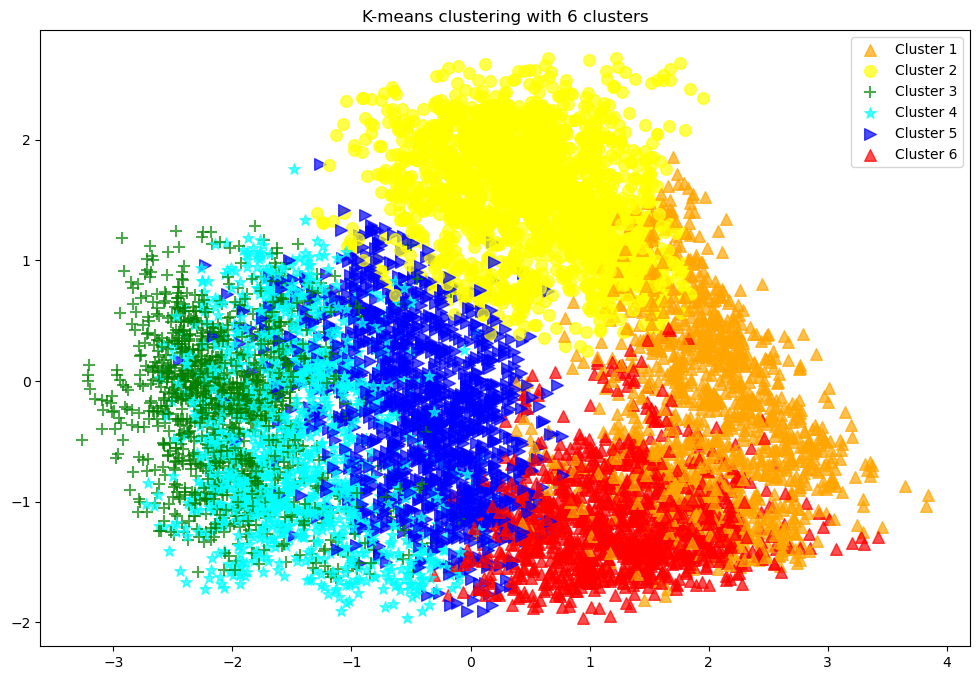

In [18]:
plt.figure(figsize=(12,8))
for i in range(pca.shape[0]):
    if(kmean.labels_[i]==0):
        c1_6=plt.scatter(pca[i,0],pca[i,1],c='orange',marker='^',alpha=0.7,s=70)
    
    elif(kmean.labels_[i]==1):
        c2_6=plt.scatter(pca[i,0],pca[i,1],c='yellow',marker='o',alpha=0.7,s=70)
    
    elif(kmean.labels_[i]==2):
        c3_6=plt.scatter(pca[i,0],pca[i,1],c='green',marker='+',alpha=0.7,s=70)
    
    elif(kmean.labels_[i]==3):
        c4_6=plt.scatter(pca[i,0],pca[i,1],c='cyan',marker='*',alpha=0.7,s=70)
    
    elif(kmean.labels_[i]==4):
        c5_6=plt.scatter(pca[i,0],pca[i,1],c='blue',marker='>',alpha=0.7,s=70)
    
    elif(kmean.labels_[i]==5):
        c6_6=plt.scatter(pca[i,0],pca[i,1],c='red',marker='^',alpha=0.7,s=70)    
        
plt.legend([c1_6,c2_6,c3_6,c4_6,c5_6,c6_6],['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'])
plt.title('K-means clustering with 6 clusters')
plt.show()